LSTM

Packages

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [9]:
# fix random seed for reproducibility
numpy.random.seed(7)

Importing dataset

In [4]:
# read the dataset into python
df = pd.read_csv('https://data.ontario.ca/dataset/f4f86e54-872d-43f8-8a86-3892fd3cb5e6/resource/ed270bb8-340b-41f9-a7c6-e8ef587e6d11/download/covidtesting.csv', index_col='Reported Date',parse_dates=True)
dataset = df.values
dataset = dataset.astype('float32')

,Confirmed Negative,Presumptive Negative,Presumptive Positive,Confirmed Positive,Resolved,Deaths,Total Cases,Total patients approved for testing as of Reporting Date,Total tests completed in the last day,Percent positive tests in last day,...,Total Positive LTC Resident Cases,Total Positive LTC HCW Cases,Total LTC Resident Deaths,Total LTC HCW Deaths,Total_Lineage_B.1.1.7_Alpha,Total_Lineage_B.1.351_Beta,Total_Lineage_P.1_Gamma,Total_Lineage_B.1.617.2_Delta,deaths_data_cleaning,newly_reported_deaths
Reported Date,,,,,,,,,,,,,,,,,,,,,
2020-02-06,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-07,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-08,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-09,NaN,NaN,0.0,2.0,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-10,NaN,NaN,0.0,2.0,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Checking for Nulls

In [5]:
df.isnull()
df.isnull().sum()

Confirmed Negative                                           710
Presumptive Negative                                         745
Presumptive Positive                                         732
Confirmed Positive                                             2
Resolved                                                      12
Deaths                                                        40
Total Cases                                                    2
Total patients approved for testing as of Reporting Date       6
Total tests completed in the last day                         69
Percent positive tests in last day                            73
Under Investigation                                            0
Number of patients hospitalized with COVID-19                 56
Number of patients in ICU due to COVID-19                     86
Number of patients in ICU, testing positive for COVID-19      56
Number of patients in ICU, testing negative for COVID-19      86
Number of patients in ICU

Changing Nulls to Mean value

In [6]:
df.fillna(df.mean(), inplace=True)

Checking Nulls

In [7]:
df.isnull()
df.isnull().sum()

Confirmed Negative                                           0
Presumptive Negative                                         0
Presumptive Positive                                         0
Confirmed Positive                                           0
Resolved                                                     0
Deaths                                                       0
Total Cases                                                  0
Total patients approved for testing as of Reporting Date     0
Total tests completed in the last day                        0
Percent positive tests in last day                           0
Under Investigation                                          0
Number of patients hospitalized with COVID-19                0
Number of patients in ICU due to COVID-19                    0
Number of patients in ICU, testing positive for COVID-19     0
Number of patients in ICU, testing negative for COVID-19     0
Number of patients in ICU on a ventilator due to COVID-

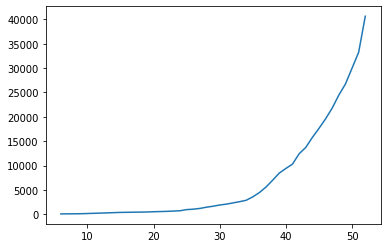

In [10]:
dataset = pandas.read_csv('https://data.ontario.ca/dataset/f4f86e54-872d-43f8-8a86-3892fd3cb5e6/resource/ed270bb8-340b-41f9-a7c6-e8ef587e6d11/download/covidtesting.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()